In [1]:
!pip install torchvision

  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 MB 19.5 MB/s eta 0:00:0000:0100:01
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.12
    Uninstalling sympy-1.12:
      Successfully uninstalled sympy-1.12


In [3]:
!pip install matplotlib

In [5]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 464.1/464.1 kB 4.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.7/146.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 10.7 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2


In [151]:
# Importing libraries
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [153]:
# DownloadING the MNIST and CIFAR-100 datasets AND Displaying the dataset
mnist_train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
mnist_test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

cifar100_train_data = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transforms.ToTensor())
cifar100_test_data = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transforms.ToTensor())

print(f"MNIST dataset loaded with {len(mnist_train_data)} training samples and {len(mnist_test_data)} test samples.")
print(f"CIFAR-100 dataset loaded with {len(cifar100_train_data)} training samples and {len(cifar100_test_data)} test samples.")


MNIST dataset loaded with 60000 training samples and 10000 test samples.
CIFAR-100 dataset loaded with 50000 training samples and 10000 test samples.


In [183]:
# Dataset Information
def dataset():
    print(f"MNIST Dataset: Number of training samples: {len(mnist_train_data)}")
    print(f"CIFAR-100 Dataset: Number of training samples: {len(cifar100_train_data)}")

dataset()

MNIST Dataset: Number of training samples: 60000
CIFAR-100 Dataset: Number of training samples: 50000


In [169]:
# Splitting of training Dataset into (4/5, 1/5)
def split_data(dataset, train_ratio=0.8):
    train_size = int(train_ratio * len(dataset))
    train_dataset = torch.utils.data.Subset(dataset, range(0, train_size))
    val_dataset = torch.utils.data.Subset(dataset, range(train_size, len(dataset)))
    return train_dataset, val_dataset

mnist_train_set, mnist_val_set = split_data(mnist_train_data)
cifar100_train_set, cifar100_val_set = split_data(cifar100_train_data)

print(f"MNIST Training set: {len(mnist_train_set)} samples, Validation set: {len(mnist_val_set)} samples")
print(f"CIFAR-100 Training set: {len(cifar100_train_set)} samples, Validation set: {len(cifar100_val_set)} samples")


MNIST Training set: 48000 samples, Validation set: 12000 samples
CIFAR-100 Training set: 40000 samples, Validation set: 10000 samples


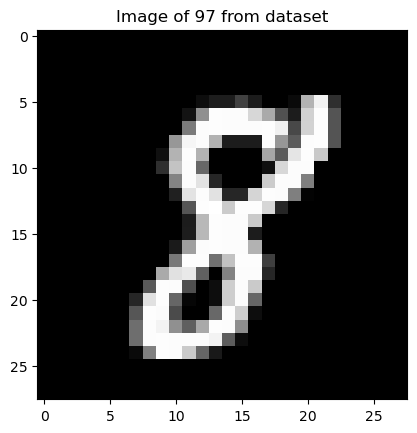

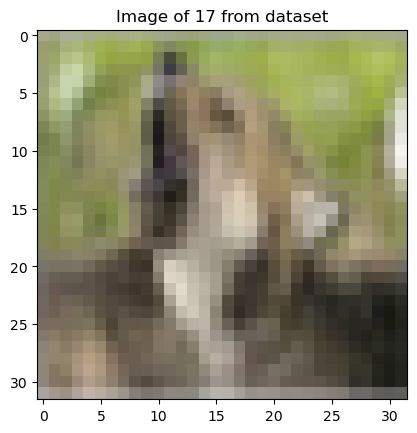

In [195]:
# Creating a function to display an image from the dataset
def disp(dataset, n, class_names):
    image, label = dataset[n]
    label_name = class_names[label] if class_names else str(label)
    
    if image.shape[0] == 1:  # MNIST (Grayscale)
        image = image.squeeze(0)
        plt.imshow(image, cmap='gray')
    else:  # CIFAR-100 (RGB)
        plt.imshow(image.permute(1, 2, 0))
    
    plt.title(f"Image of {n} from dataset")
    plt.show()

# Displaying example images
disp(mnist_train, 97, mnist_classes)  # Example for MNIST
disp(cifar100_train, 17, cifar100_classes)  # Example for CIFAR-100


In [197]:
# Printing the label of a specific sample
def print_label(dataset, n, class_names):
    _, label = dataset[n]
    print(f"Sample {n} label: '{class_names[label]}'")

print_label(mnist_train, 97, mnist_classes)  # Example for MNIST
print_label(cifar100_train, 17, cifar100_classes)  # Example for CIFAR-100


Sample 97 label: '8'
Sample 17 label: 'wolf'
